# Proyek Analisis Data: Nama dataset
- Nama: Nur Cholis Majid
- Email: cholis03majid@gmail.com
- Id Dicoding: nur_cholis

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana distribusi penyewaan sepeda pada setiap musim? Apakah ada musim yang memiliki tingkat penyewaan lebih tinggi dibandingkan dengan musim lainnya?
- pertanyaan 2 : Apakah hari-hari libur atau hari kerja memiliki dampak yang signifikan pada jumlah penyewaan sepeda? Bagaimana distribusi penyewaan pada hari-hari libur dan hari kerja?
- pertanyaan 3 : Pada jam berapa sepeda paling sering disewa, dan apakah ada tren atau pola menarik dalam pola penyewaan tersebut?

## Menyaipkan semua library yang dibutuhkan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
# Memanggil dataset hour
# Gunakan URL raw GitHub sebagai path
url = 'https://github.com/OlisUnesa062/Project-Analisis-Data-menggunakan-Python-Dicoding-/raw/main/Project%20Dicoding/data/hour.csv'

# Gunakan read_csv untuk membaca dataset dari URL
hour_df = pd.read_csv(url)

# Tampilkan dataset
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [32]:
# Memanggil dataset day
# Gunakan URL raw GitHub sebagai path
url = 'https://github.com/OlisUnesa062/Project-Analisis-Data-menggunakan-Python-Dicoding-/raw/main/Project%20Dicoding/data/day.csv'

# Gunakan read_csv untuk membaca dataset dari URL
day_df = pd.read_csv(url)

# Tampilkan dataset
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Assesing Data Hour

In [33]:
# Assesing Data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
# Mengecek missing value dari data hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
# Mengecek duplicate data dari data hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
# Mendeskripsikan data hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Assesing Data Day

In [37]:
# Assesing Data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [38]:
# Mengecek missing value dari data day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
# Mengecek duplicate data dari data day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
# Mendeskripsikan data day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [41]:
# Melakukan merge dengan mengambil kolom 'hr' dari hour_df
bike_sharing_df = pd.merge(
    left=day_df,
    right=hour_df[['dteday', 'hr']],
    how='left',
    left_on='dteday',
    right_on='dteday',
    suffixes=('_day', '_hour')
)
bike_sharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,19
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,20
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,21
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,22


In [42]:
# Drop kolom yang tidak diinginkan
kolom_drop = ['yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'atemp', 'hum', 'casual', 'registered','instant','dteday','temp','windspeed']
bike_sharing_df = bike_sharing_df.drop(columns=kolom_drop, axis=1)

# Menampilkan DataFrame setelah perubahan
bike_sharing_df

,season,workingday,cnt,hr
0,1,0,985,0
1,1,0,985,1
2,1,0,985,2
3,1,0,985,3
4,1,0,985,4
...,...,...,...,...
17374,1,1,2729,19
17375,1,1,2729,20
17376,1,1,2729,21
17377,1,1,2729,22


In [43]:
# Mengubah nama kolom agar lebih mudah dipahami
bike_sharing_df = bike_sharing_df.rename(columns={'season': 'musim', 'workingday': 'hari_libur/kerja', 'cnt': 'total_penyewaan_sepeda','hr':'jam'})

# Menampilkan DataFrame sesudah di rename
print("DataFrame Sesudah rename:")
bike_sharing_df

DataFrame Sesudah rename:


,musim,hari_libur/kerja,total_penyewaan_sepeda,jam
0,1,0,985,0
1,1,0,985,1
2,1,0,985,2
3,1,0,985,3
4,1,0,985,4
...,...,...,...,...
17374,1,1,2729,19
17375,1,1,2729,20
17376,1,1,2729,21
17377,1,1,2729,22


In [44]:
# Mengganti nilai pada kolom 'hari_libur/kerja'
bike_sharing_df['hari_libur/kerja'] = bike_sharing_df['hari_libur/kerja'].replace({0: 'Hari Libur', 1: 'Hari Kerja'})

# Mengganti nilai pada kolom 'musim'
bike_sharing_df['musim'] = bike_sharing_df['musim'].replace({1: 'musim semi', 2: 'musim panas', 3: 'musim gugur', 4: 'musim dingin'})

bike_sharing_df

,musim,hari_libur/kerja,total_penyewaan_sepeda,jam
0,musim semi,Hari Libur,985,0
1,musim semi,Hari Libur,985,1
2,musim semi,Hari Libur,985,2
3,musim semi,Hari Libur,985,3
4,musim semi,Hari Libur,985,4
...,...,...,...,...
17374,musim semi,Hari Kerja,2729,19
17375,musim semi,Hari Kerja,2729,20
17376,musim semi,Hari Kerja,2729,21
17377,musim semi,Hari Kerja,2729,22


## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
bike_sharing_df.describe(include="all")

,musim,hari_libur/kerja,total_penyewaan_sepeda,jam
count,17379,17379,17379.000000,17379.000000
unique,4,2,NaN,NaN
top,musim gugur,Hari Kerja,NaN,NaN
freq,4496,11865,NaN,NaN
mean,NaN,NaN,4533.692963,11.546752
std,NaN,NaN,1917.376947,6.914405
min,NaN,NaN,22.000000,0.000000
25%,NaN,NaN,3214.000000,6.000000
50%,NaN,NaN,4563.000000,12.000000
75%,NaN,NaN,5986.000000,18.000000


In [46]:
bike_sharing_df.to_csv("bike_sharing_df.csv", index=False)

In [47]:
# Membuat statistik deskriptif berdasarkan kolom 'musim'
deskriptif_musim = bike_sharing_df.groupby('musim')['total_penyewaan_sepeda'].describe()

# Menampilkan statistik deskriptif
print(deskriptif_musim)

               count         mean          std     min     25%     50%  \
musim                                                                    
musim dingin  4232.0  4765.366021  1654.202601    22.0  3620.0  4639.0   
musim gugur   4496.0  5654.093194  1446.451168  1115.0  4590.0  5362.0   
musim panas   4409.0  4995.253119  1690.209773   795.0  4010.0  4966.0   
musim semi    4242.0  2635.348185  1391.789800   431.0  1550.0  2294.0   

                 75%     max  
musim                         
musim dingin  5629.0  8555.0  
musim gugur   6966.0  8714.0  
musim panas   6398.0  8362.0  
musim semi    3487.0  7836.0  


In [48]:
# Membuat statistik deskriptif berdasarkan kolom 'hari_libur/bukan'
deskriptif_hari_libur_kerja = bike_sharing_df.groupby('hari_libur/kerja')['total_penyewaan_sepeda'].describe()

# Menampilkan statistik deskriptif
print(deskriptif_hari_libur_kerja)

                    count         mean          std    min     25%     50%  \
hari_libur/kerja                                                             
Hari Kerja        11865.0  4622.855204  1848.635641   22.0  3392.0  4590.0   
Hari Libur         5514.0  4341.834059  2044.550623  605.0  2732.0  4459.0   

                     75%     max  
hari_libur/kerja                  
Hari Kerja        6073.0  8362.0  
Hari Libur        5923.0  8714.0  


In [49]:
# Statistik deskriptif untuk kolom total_penyewaan_sepeda pada setiap jam
deskriptif_jam = bike_sharing_df.groupby('jam')['total_penyewaan_sepeda'].describe()

# Menampilkan statistik deskriptif
print(deskriptif_jam)

     count         mean          std    min      25%     50%     75%     max
jam                                                                         
0    726.0  4524.359504  1925.177967   22.0  3196.50  4558.0  5983.5  8714.0
1    724.0  4533.084254  1919.347747  441.0  3211.50  4566.0  5987.5  8714.0
2    715.0  4561.169231  1910.503257  441.0  3246.00  4576.0  6032.5  8714.0
3    697.0  4615.865136  1885.762749  441.0  3331.00  4595.0  6053.0  8714.0
4    697.0  4642.246772  1864.898902  441.0  3376.00  4629.0  6053.0  8714.0
5    717.0  4565.804742  1899.558057  441.0  3249.00  4576.0  6031.0  8714.0
6    725.0  4531.057931  1918.386308  441.0  3204.00  4563.0  5986.0  8714.0
7    727.0  4526.061898  1919.986754  441.0  3199.00  4553.0  5981.0  8714.0
8    727.0  4526.061898  1919.986754  441.0  3199.00  4553.0  5981.0  8714.0
9    727.0  4526.061898  1919.986754  441.0  3199.00  4553.0  5981.0  8714.0
10   727.0  4526.061898  1919.986754  441.0  3199.00  4553.0  5981.0  8714.0

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penyewaan sepeda pada setiap musim? Apakah ada musim yang memiliki tingkat penyewaan lebih tinggi dibandingkan dengan musim lainnya?

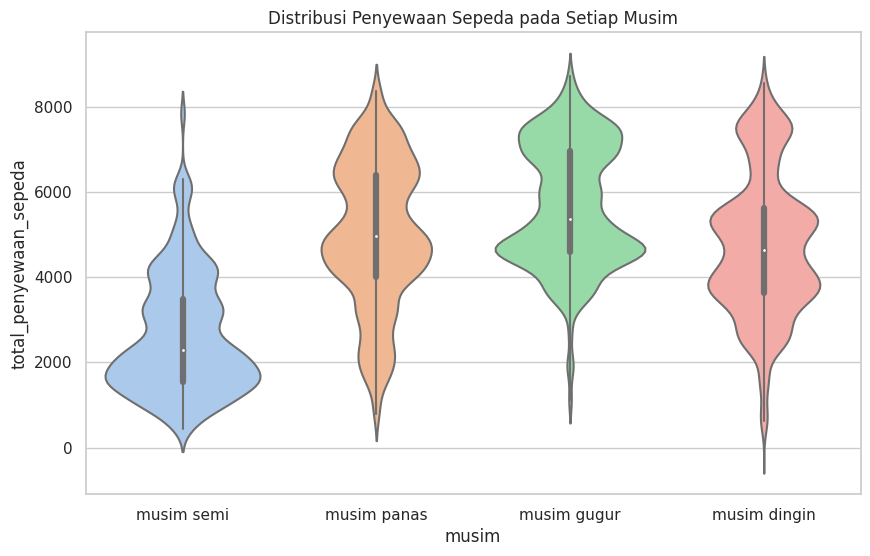

In [50]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat violin plot untuk distribusi penyewaan pada setiap musim
sns.violinplot(x='musim', y='total_penyewaan_sepeda', data=bike_sharing_df, palette='pastel')

# Menambahkan judul
plt.title('Distribusi Penyewaan Sepeda pada Setiap Musim')

# Menampilkan plot
plt.show()

### Pertanyaan 2 : Apakah hari-hari libur atau hari kerja memiliki dampak yang signifikan pada jumlah penyewaan sepeda? Bagaimana distribusi penyewaan pada hari-hari libur dan hari kerja?

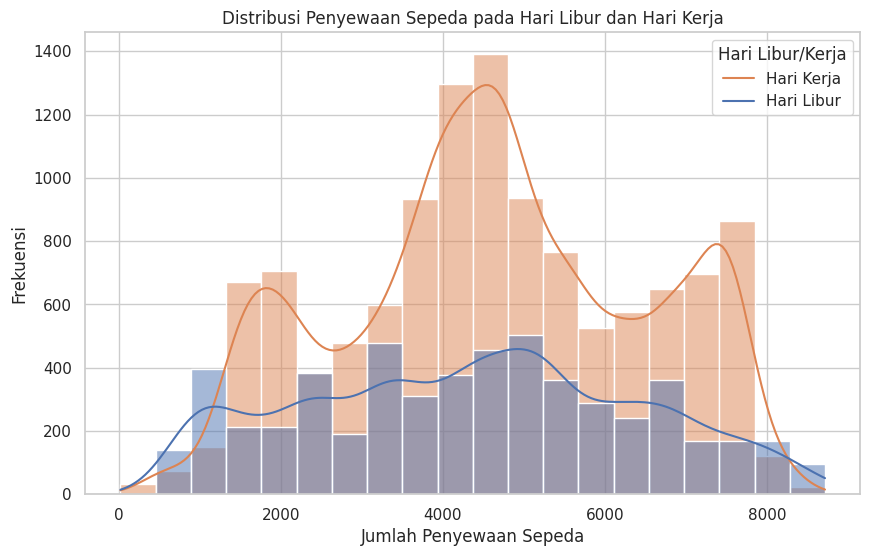

In [51]:
# Visualisasi distribusi penyewaan pada hari libur dan hari kerja
plt.figure(figsize=(10, 6))
sns.histplot(data=bike_sharing_df, x='total_penyewaan_sepeda', hue='hari_libur/kerja', bins=20, kde=True)
plt.title('Distribusi Penyewaan Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.legend(title='Hari Libur/Kerja', labels=['Hari Kerja', 'Hari Libur'])
plt.show()

### Pertanyaan 3 : Pada jam berapa sepeda paling sering disewa, dan apakah ada tren atau pola menarik dalam pola penyewaan tersebut?

<ipython-input-52-0c809a041626>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='jam', y='total_penyewaan_sepeda', data=bike_sharing_df, ci=None, color='skyblue')


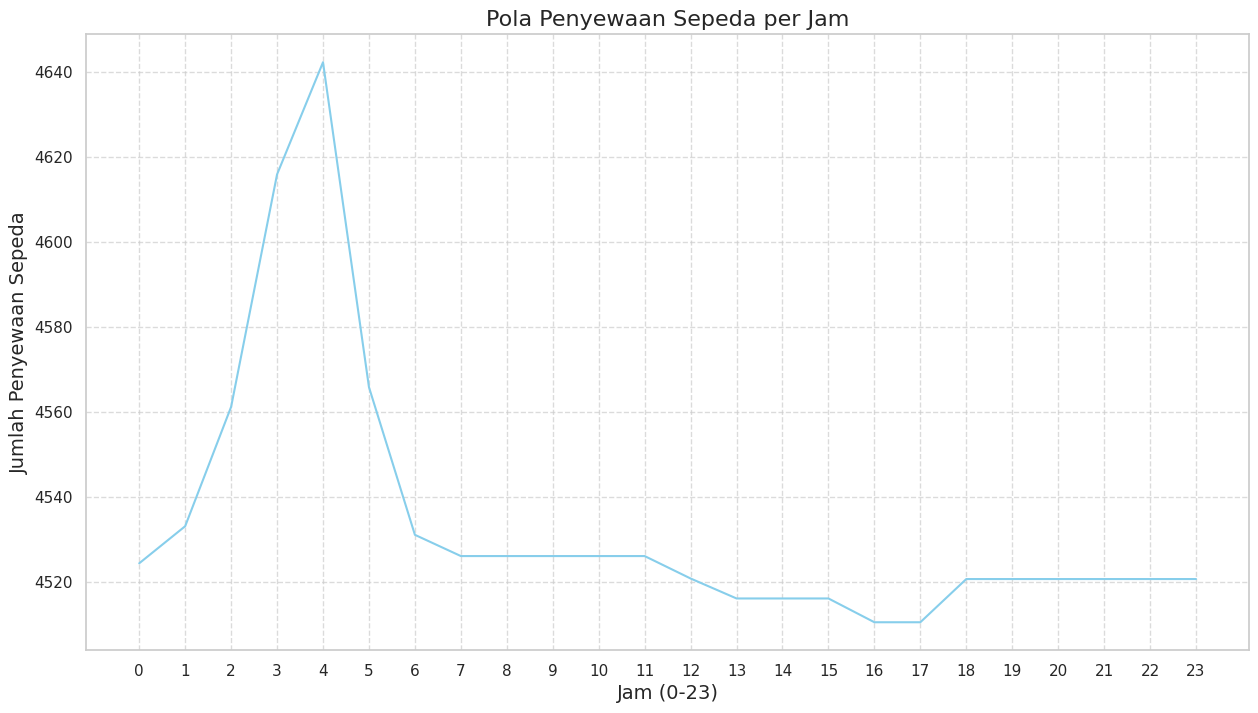

In [52]:
# Mengatur tema dan warna latar belakang
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 8))

# Membuat line chart untuk pola sepanjang hari dengan warna yang kontras
sns.lineplot(x='jam', y='total_penyewaan_sepeda', data=bike_sharing_df, ci=None, color='skyblue')

# Menambahkan label dan judul
plt.title('Pola Penyewaan Sepeda per Jam', fontsize=16)
plt.xlabel('Jam (0-23)', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)

# Menambahkan grid untuk memudahkan membaca
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan line chart
plt.xticks(range(24))  # Menambahkan label jam dari 0 hingga 23
plt.show()

## Conclusion

*Conclution pertanyaan 1 : Bagaimana distribusi penyewaan sepeda pada setiap musim? Apakah ada musim yang memiliki tingkat penyewaan lebih tinggi dibandingkan dengan musim lainnya?*

Berdasarkan analisis distribusi penyewaan sepeda pada setiap musim, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam tingkat penyewaan sepeda antar musim. Musim gugur menunjukkan tingkat penyewaan sepeda yang paling tinggi, sedangkan musim semi memiliki tingkat penyewaan yang lebih rendah dibandingkan dengan musim lainnya. Meskipun terdapat perbedaan, perlu dicatat bahwa perbedaan tersebut mungkin tidak terlalu signifikan secara praktis. Oleh karena itu, sementara musim gugur dapat dianggap sebagai puncak periode aktivitas penyewaan sepeda, dan musim semi cenderung memiliki tingkat penyewaan yang lebih rendah

*Conclution pertanyaan 2: Apakah hari-hari libur atau hari kerja memiliki dampak yang signifikan pada jumlah penyewaan sepeda? Bagaimana distribusi penyewaan pada hari-hari libur dan hari kerja?*

Berdasarkan analisis terhadap dampak hari-hari libur dan hari kerja terhadap jumlah penyewaan sepeda, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam distribusi penyewaan sepeda antara hari kerja dan hari libur. Frekuensi penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini menunjukkan bahwa aktivitas penyewaan sepeda lebih diminati dan lebih tinggi pada hari-hari kerja.

*Conclution pertanyaan 3: Pada jam berapa sepeda paling sering disewa, dan apakah ada tren atau pola menarik dalam pola penyewaan tersebut?*

Berdasarkan analisis pola penyewaan sepeda pada setiap jam, dapat disimpulkan bahwa rata-rata jumlah penyewaan sepeda relatif stabil sepanjang hari. Namun, terdapat tren menarik yang dapat diamati pada jam-jam dini hari, khususnya pada jam 2, 3, dan 4 pagi. Pada jam-jam tersebut, terjadi peningkatan yang cukup signifikan dalam jumlah penyewaan sepeda. Hal ini menunjukkan adanya pola unik di mana sepeda paling sering disewa pada jam-jam tertentu di dini hari.

**Conclusion final : Berdasarkan analisis data, dapat disimpulkan bahwa distribusi penyewaan sepeda bervariasi pada setiap musim, dengan musim gugur menunjukkan tingkat penyewaan tertinggi dan musim semi cenderung memiliki tingkat yang lebih rendah. Meskipun ada perbedaan, perlu diperhatikan bahwa perbedaan tersebut mungkin tidak begitu signifikan secara praktis. Selanjutnya, hari-hari kerja memiliki dampak yang lebih besar pada frekuensi penyewaan sepeda dibandingkan dengan hari libur, menunjukkan preferensi pengguna untuk aktivitas ini pada hari-hari kerja. Selain itu, pola penyewaan sepeda relatif stabil sepanjang hari, tetapi terdapat tren menarik pada jam-jam dini hari, di mana terjadi peningkatan signifikan dalam jumlah penyewaan sepeda. Temuan ini dapat menjadi dasar penting untuk pengelolaan dan perencanaan layanan penyewaan sepeda.**